## 项目介绍
利用slim框架，预训练模型inceptionV4，训练一个可以识别764中车型的模型。
## 数据集
CSDN提供的车辆检测数据集是已经打包成tfrecord格式的文件（训练的话就不需要进行打包操作，直接用来训练即可），将tfrecord转成图片的程序请参考CSND学院培训实战项目02*
## 程序
#### 程序是直接拿的第十一周基础作业(汉字识别)的文件夹。
### 需要修改的地方
   1. dataset_factory.py
   >from datasets import cars
   >'cars': cars
   2. 根据flowers.py创建cars.py，并做如下修改：
   >_num_classes:修改成本数据集的分类个数765
   >_FILE_PATFERN='cars_%s_*.tfrecord'（cars可以改成提供的tfrecord文件名来修改，之前就是因为这个总是报错）
   >修改train和validation个数，本数据集分别是43971，4885.  这个应该是用来将数据打包成tfrecord时候用的参数。
   3. 修改train_images_classify.py
   >dataset_name---cars
   >dataset_split_name----train
   >dataset_dir---/home/zjy/test/车辆检测/train    (这里有个问题是需不需要把tfrecord放到trian文件夹，但是最好创建一个train文件夹，然后把tfrecord文件放入，因为之前有报错未找到train*file，所以创建的，但也有可能是因为之前没有修改cars.py里面的_FILE_PATFERN='cars_%s_*.tfrecord'造成的)
   >train_dir----./train_dir    (这个是用来存放训练时候生成的ckpt文件以及训练的sunmmary文件的)
   
   >learning_rate--0.001 (0.001是老师文档里面说的，但是这次训练我忘了修改了，用的0.01)
   
   >model_name---inception_v4
   
   >batch_size----32
   
   >checkpoint_path--/home/zjy/test/inceptin_v4.ckpt
   
   >checkpoint_exclude_scopes---InceptionV4/Logits,InceptionV4/AuxLogits
   


## 训练
python3 /home/../train_image_classifier.py    (因为很多参数都已经在train_image_classifier.py里面修改好了，所以直接运行就行了)

## 验证
#### 屏蔽GUP（若GPU被占用的话）
>export CUDA_VISIBLE_DEVICES=''

#### 修改eval_image_classify.pu
   1. batch_size  32
   2. max_num_batches   128   这个是验证的时候总共验证几个batches
   3. checkpoint_patch  /home/zjy/test/train_dir  训练过程中保存的ckpt
   4. eval_dir   /home/zjy/test/eval_dir   用来指定验证时候保存summary的地址
   5. dataset_name   cars
   6. dataset_split_name   validation
   7. dataset_dir  /home/zjy/test/车辆检测/train    存放验证用的tfrecord地址
   8. model_name  inception_v4
### 执行命令进行验证
>python3 /home/.../eval_image_classify.py

## 保存模型
#### 修改export_and_freeze.sh脚本文件
#### 运行脚本文件
>sh export_and_freeze.sh

生成的.pb文件在/tmp文件中
>cd /tmp
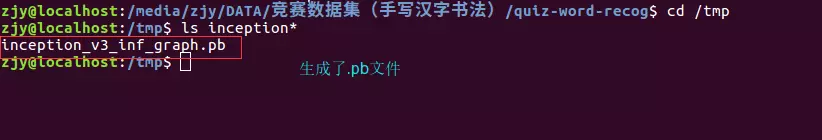
>这个东西好像没什么用，可以看下视频教程里面是怎么说的，待解决。

quiz-word-recog文件夹内生成.pb文件，是我们使用模型需要用到的：
>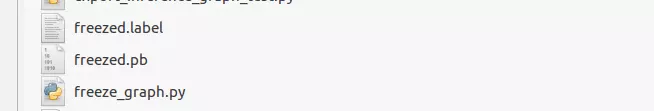

## 模型使用

#### 1. 通过命令行使用模型
   1. 修改classify_image.sh脚本文件
   >--image_file 这里写需要测试的图片地址＋文件名
   2. 运行脚本文件
   >sh classify_image.sh

#### 2. 通过web使用模型
   运行脚本文件
   >sh server.sh
   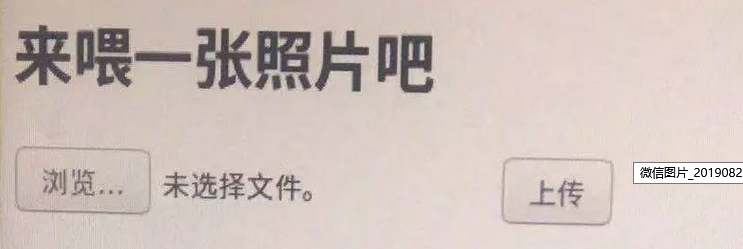

#### 3. 用python写个GUI
TODO